In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.ticker import MaxNLocator

In [3]:
runs1=torch.load('results/glue_retrain/glue_results_retrain_seed42.pth')
runs2=torch.load('results/glue_retrain/glue_results_retrain_seed101.pth')
runs3=torch.load('results/glue_retrain/glue_results_retrain_seed255.pth')
runs=[runs1,runs2,runs3]

In [34]:
[VH1[i][1] for i in range(len(VH1))]

[[tensor(0.5000)],
 [tensor(0.5000)],
 [tensor(0.5000)],
 [tensor(0.5000)],
 [tensor(0.5000)],
 [tensor(0.5000)],
 [tensor(0.5000)],
 [tensor(0.5000)],
 [tensor(0.5000)],
 [tensor(0.5000)],
 [tensor(0.5000)],
 [tensor(0.5000)],
 [tensor(0.5000)],
 [tensor(0.5036)],
 [tensor(0.5036)],
 [tensor(0.5036)],
 [tensor(0.4911)],
 [tensor(0.4786)],
 [tensor(0.4786)],
 [tensor(0.4786)],
 [tensor(0.5000)],
 [tensor(0.5000)],
 [tensor(0.5000)],
 [tensor(0.5000)],
 [tensor(0.5000)]]

In [33]:
[np.mean([VH1[i][1],VH2[i][1],VH3[i][1]]) for i in range(len(VH1))]

[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.49341395,
 0.49153224,
 0.48965052,
 0.47943547,
 0.47701612,
 0.4799731,
 0.4870968,
 0.49005377,
 0.48696235,
 0.48333335,
 0.48145163,
 0.44502687,
 0.45336023,
 0.4467742,
 0.4669355,
 0.46330643,
 0.47096774,
 0.5114247,
 0.48991933]

In [7]:

def plot_results_retrain(run_dict):
    styles=['--',':']

    for task in run_dict.keys():
        fig, ax = plt.subplots(figsize=(15,5))
        fig.suptitle(task, fontsize=16)
        runs = run_dict[task]
        colors = plt.cm.plasma(np.linspace(0, 1, len(runs.keys())+1))
        for i,run in enumerate(runs.keys()):
            plt.subplot(1,2,1)
            plt.title('training loss')
            H=runs[run]['history']
            h=H['history']
            n=len(h)//10
            plt.plot(np.arange(len(h))/H['batch_per_epoch'],h, color=colors[i], alpha=0.2)
            h1= np.convolve(h, np.ones(n)/n, mode='same')/(np.convolve(np.ones(len(h)), np.ones(n)/n, mode='same')+1e-7)
            plt.plot((np.arange(len(h1))+len(h)-len(h1))/H['batch_per_epoch'],h1, color=colors[i], label=run)
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
            plt.legend()
            
            plt.subplot(1,2,2)
            V=runs[run]['validation']
            if V is not None:
                VH=V['val_history']
                plt.title('metrics')
                for j, name in enumerate(V['metrics']):
                    if (i==0):
                        plt.plot([x/H['batch_per_epoch'] for x,y in VH],[y[j] for x,y in VH],styles[j], color=colors[i], label=name, alpha=0.7)
                    else:
                        plt.plot([x/H['batch_per_epoch'] for x,y in VH],[y[j] for x,y in VH],styles[j], color=colors[i], alpha=0.7)
            plt.legend([*V['metrics']])

C:\Users\Sam\AppData\Local\Temp\ipykernel_1764\2146097872.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


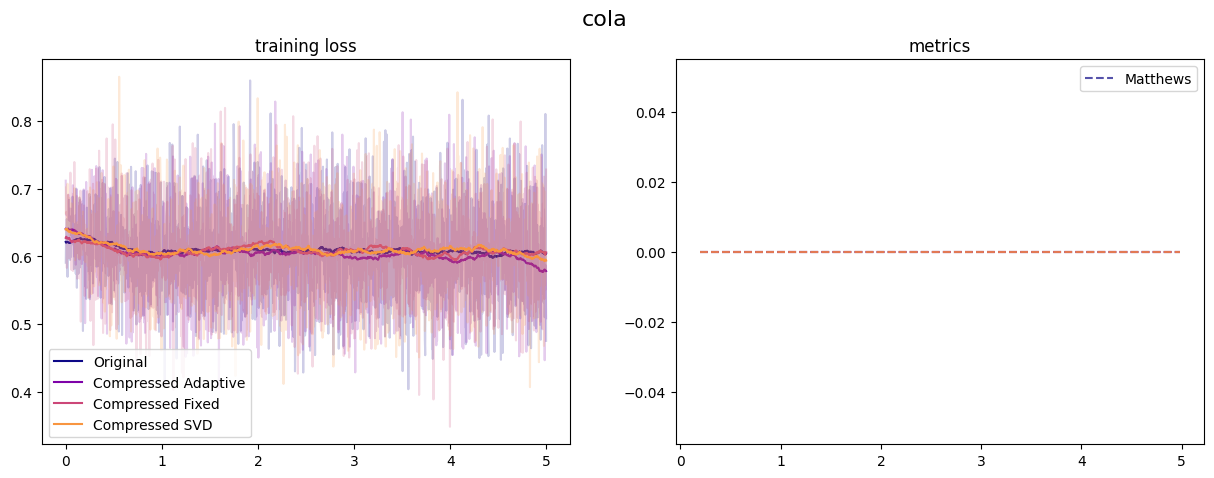

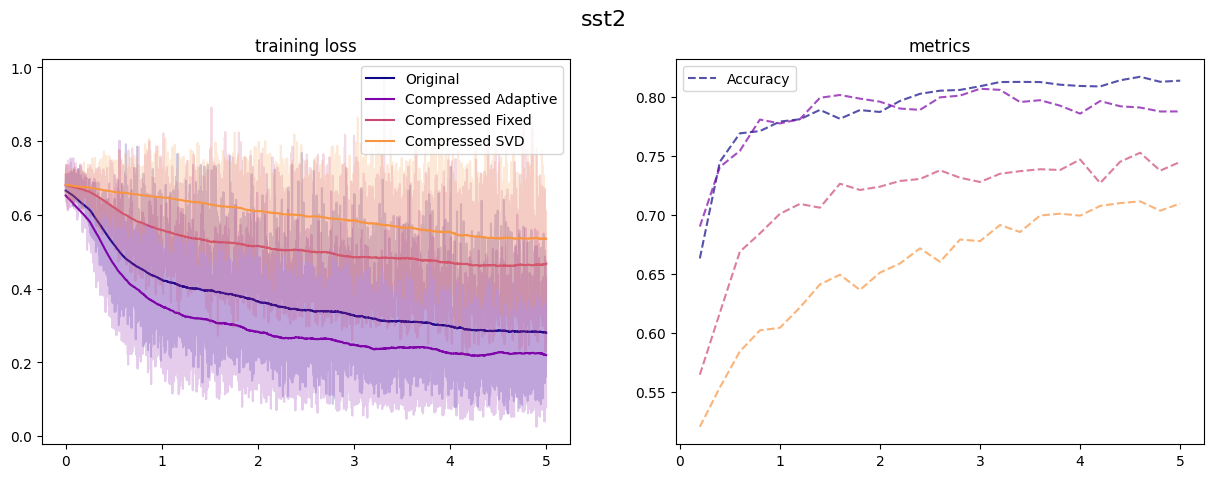

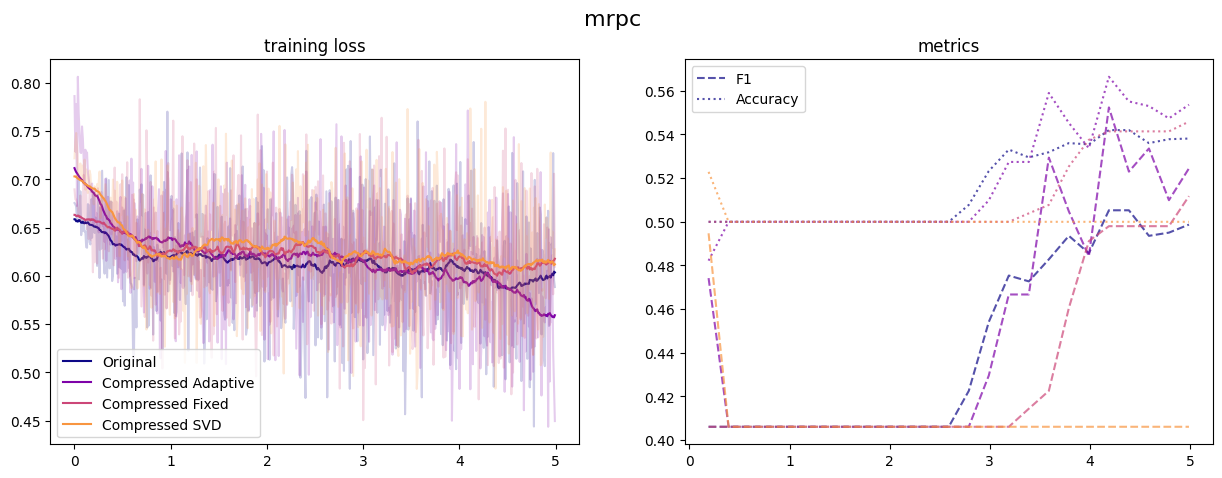

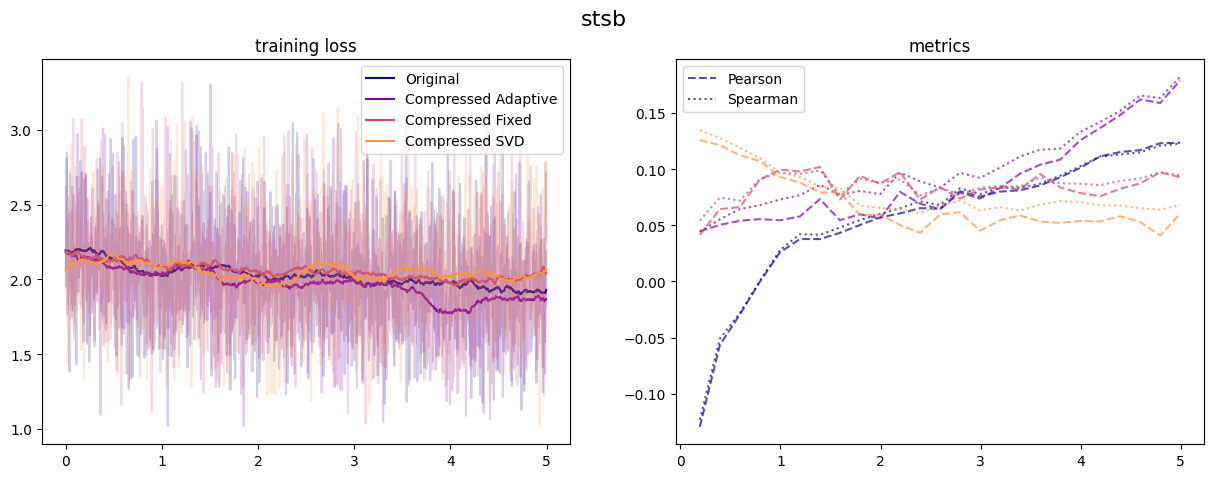

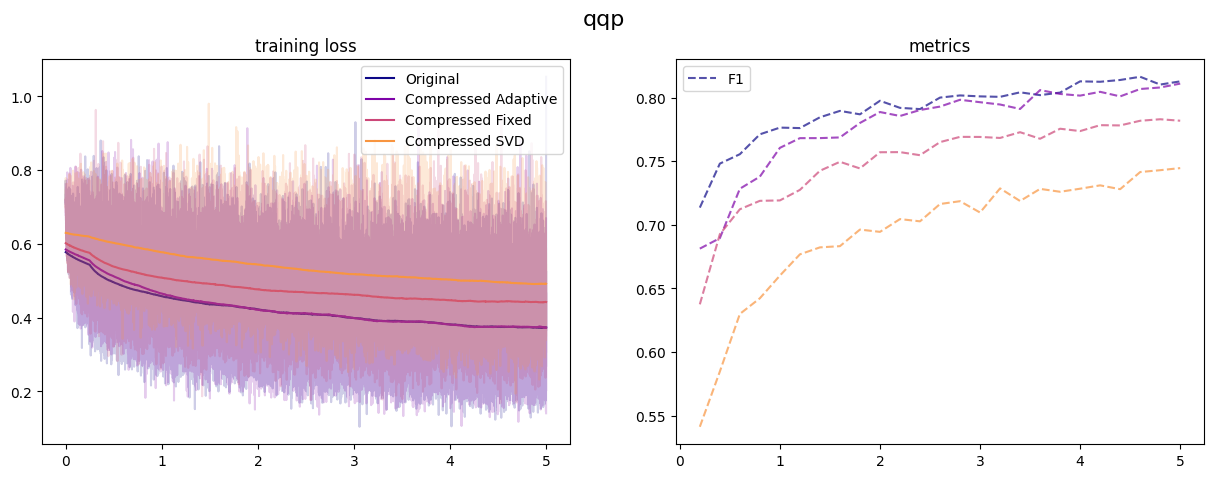

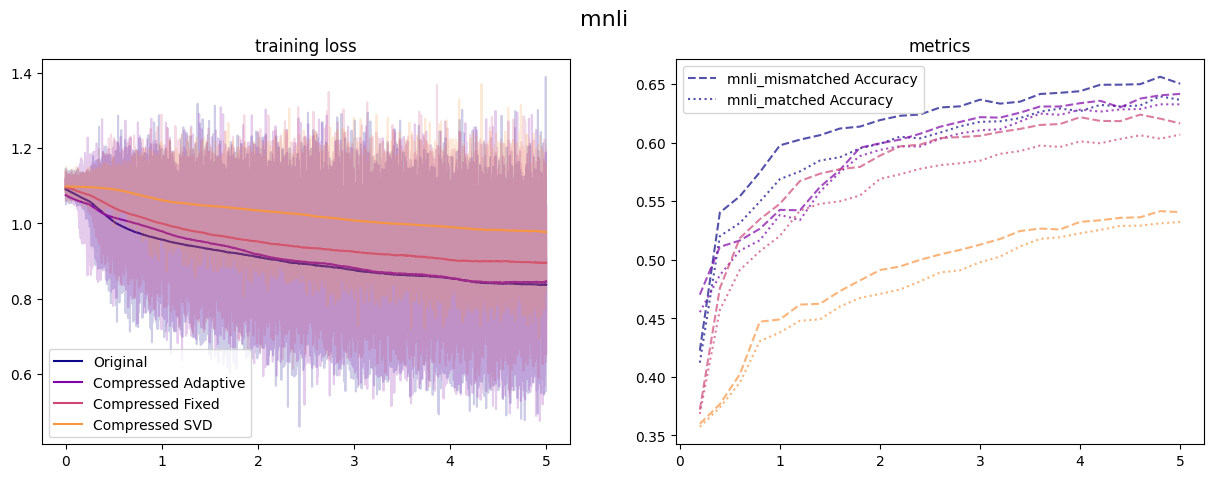

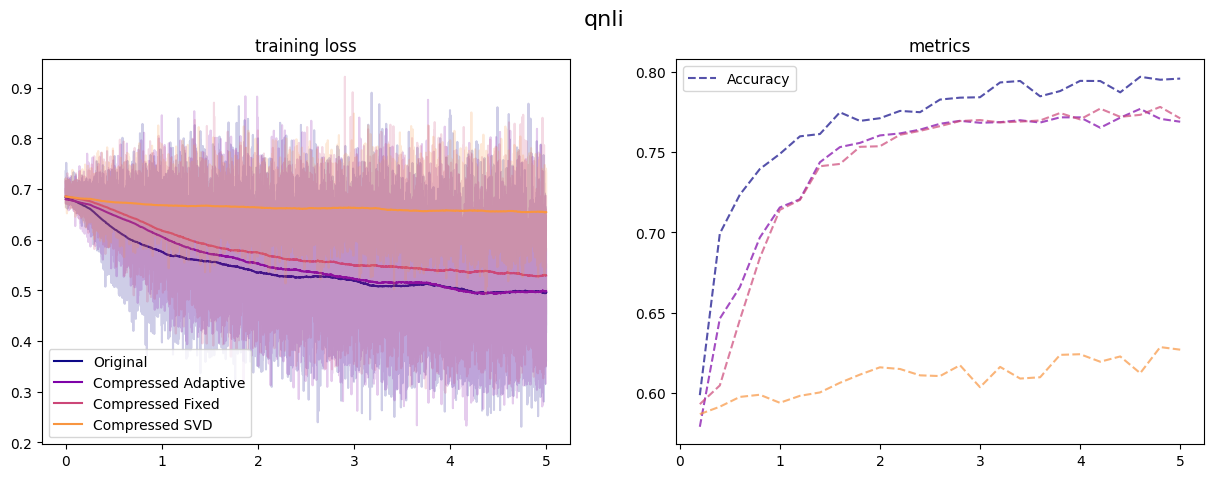

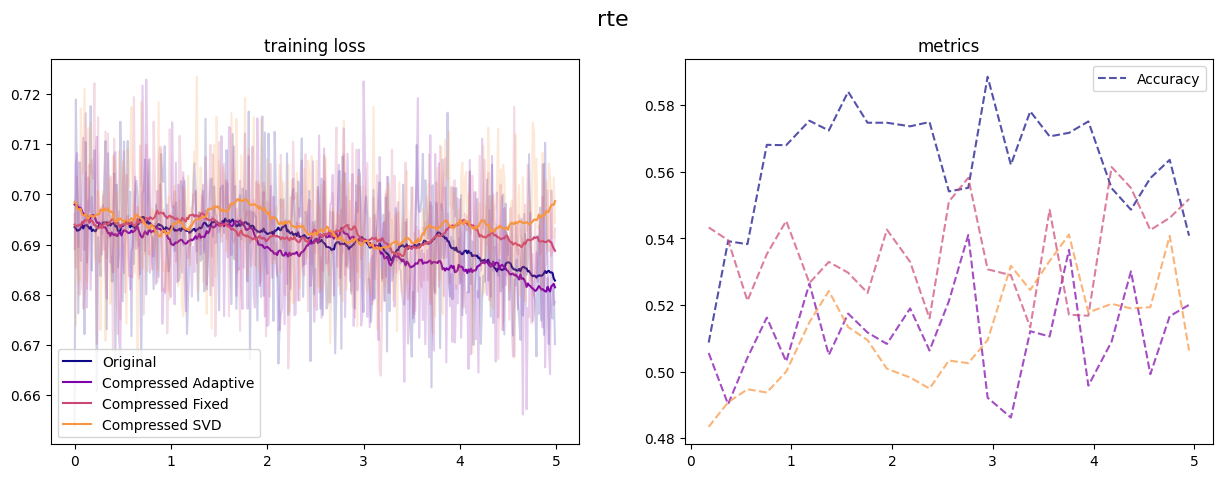

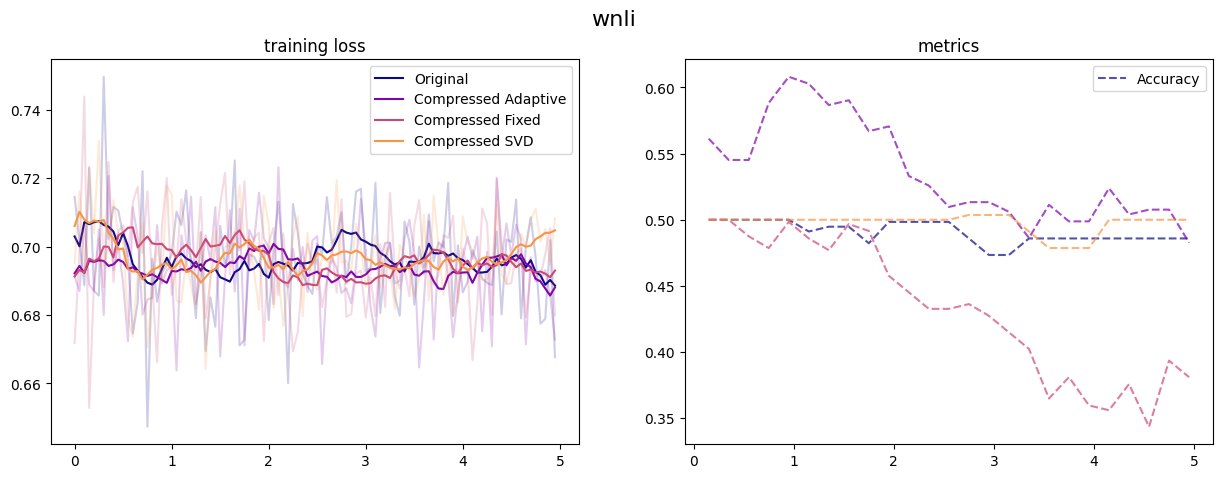

In [8]:
plot_results_retrain(runs1)

C:\Users\Sam\AppData\Local\Temp\ipykernel_1764\1281943259.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


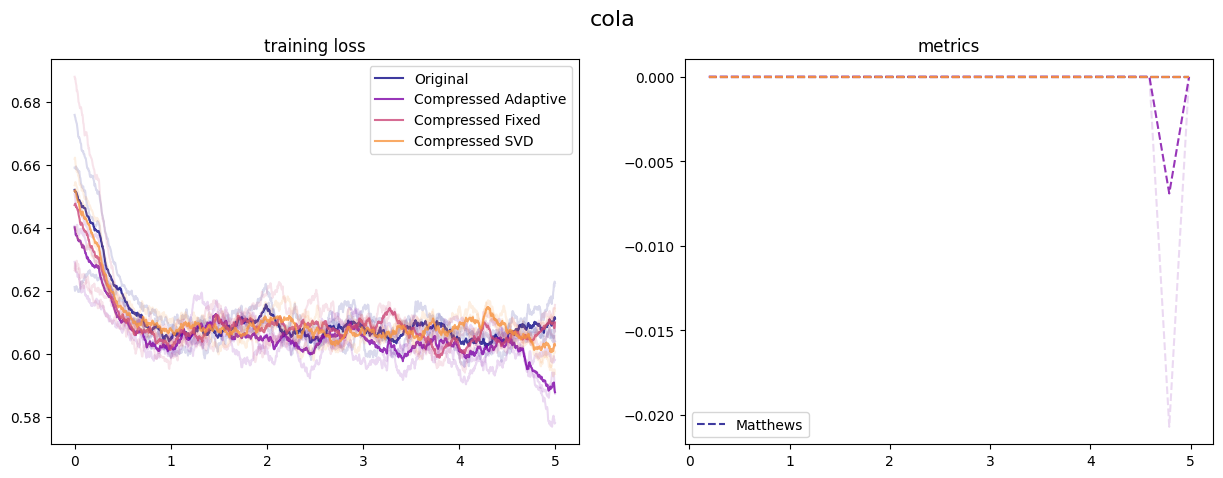

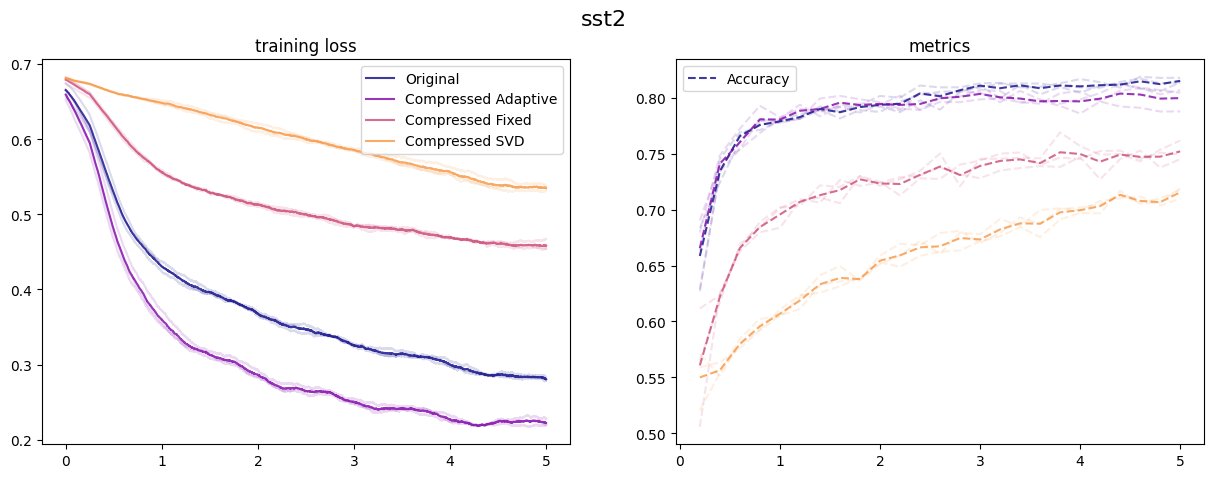

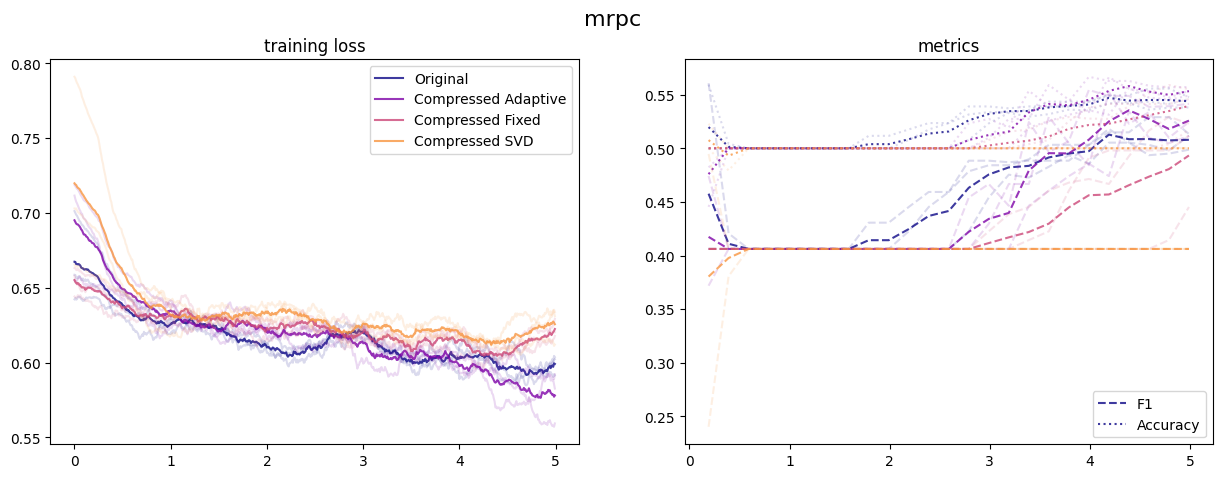

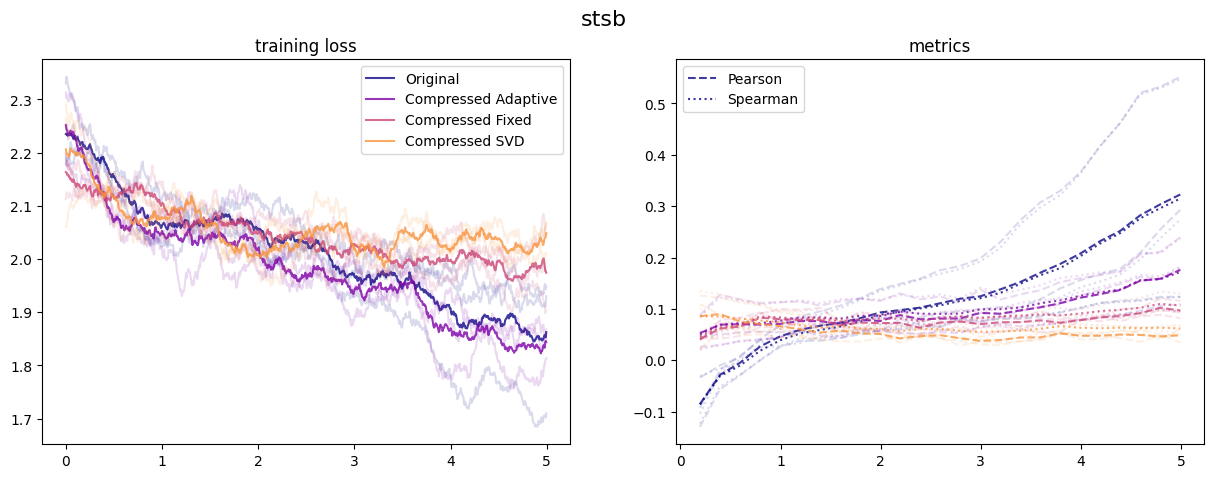

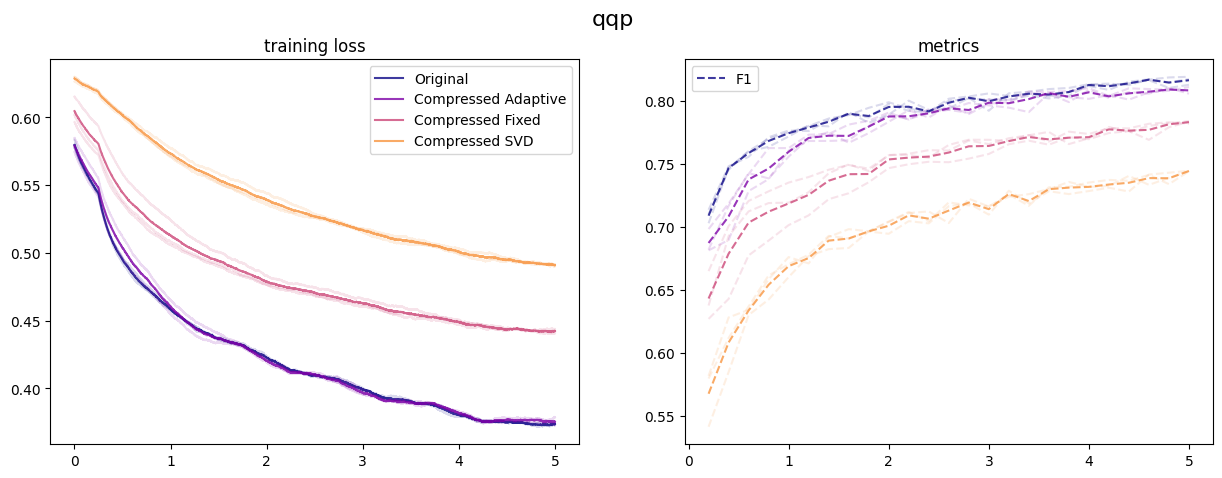

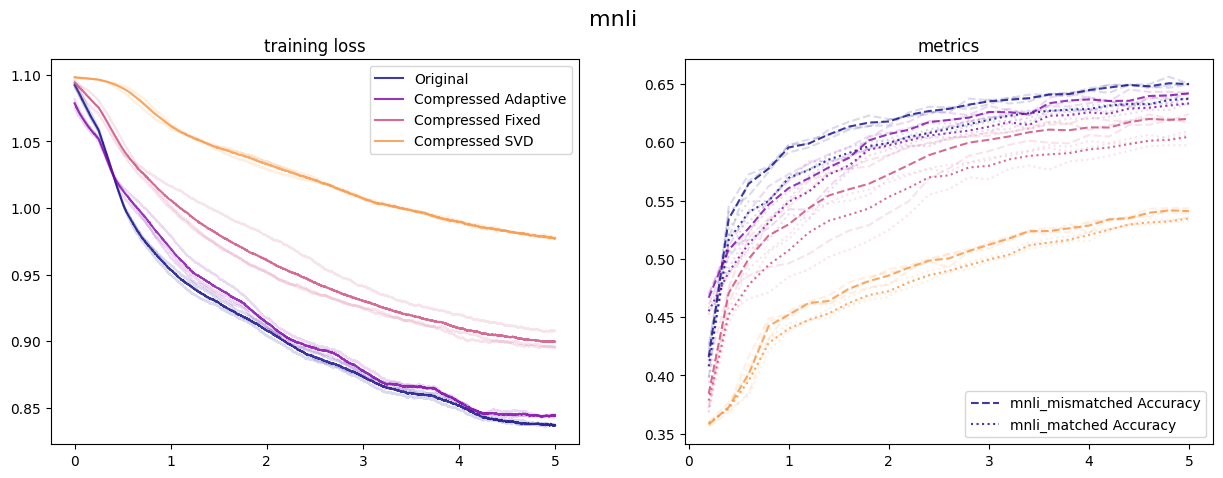

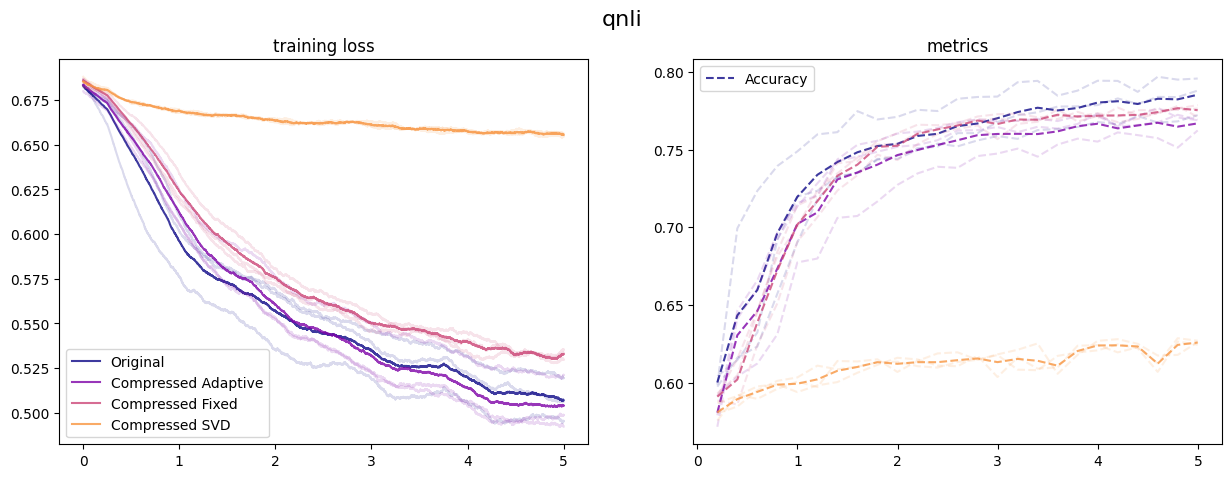

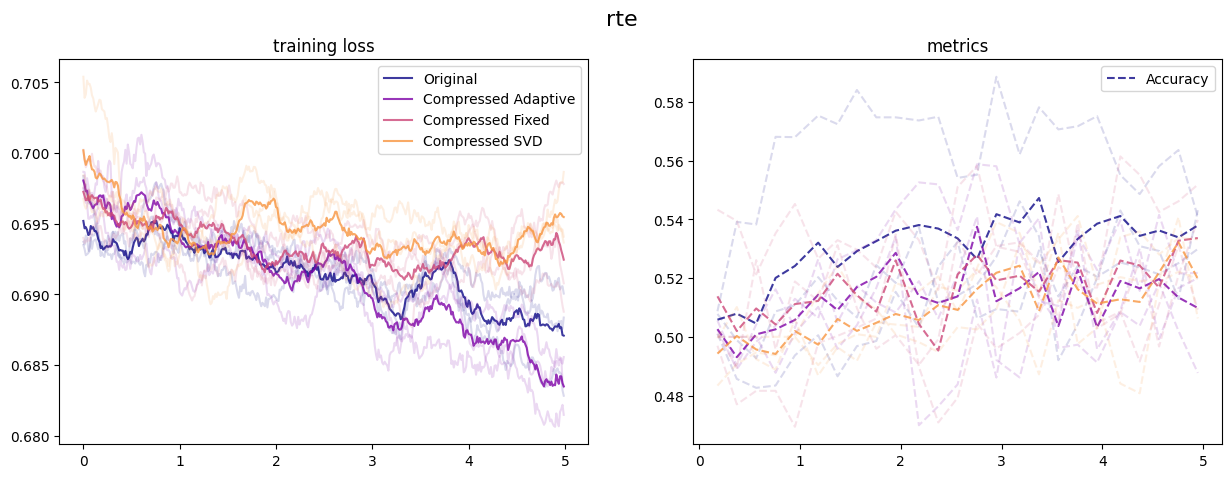

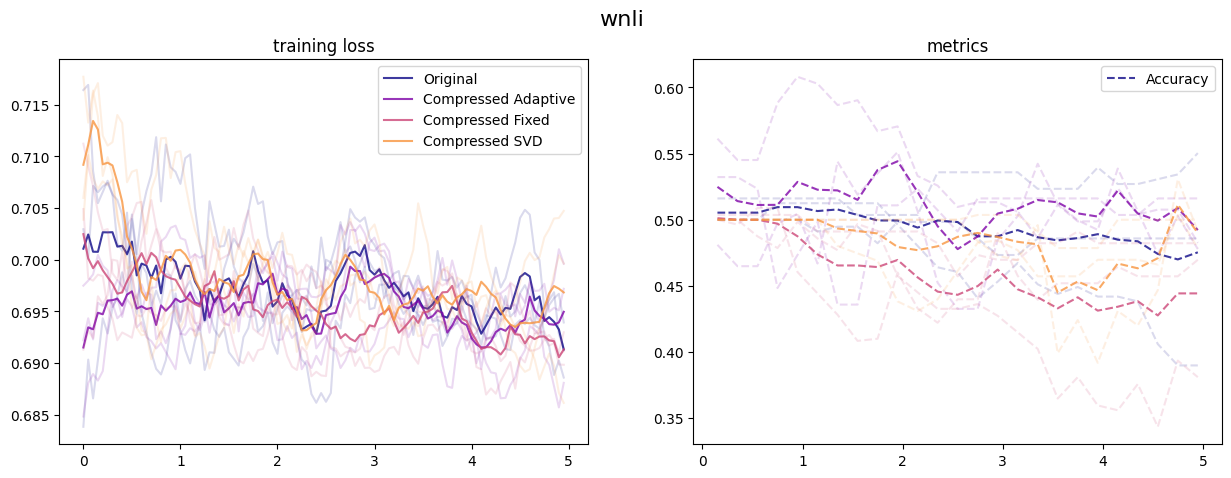

In [40]:
styles=['--',':']

for task in runs1.keys():
    fig, ax = plt.subplots(figsize=(15,5))
    fig.suptitle(task, fontsize=16)
    r1 = runs1[task]
    r2 = runs2[task]
    r3 = runs3[task]
    colors = plt.cm.plasma(np.linspace(0, 1, len(r1.keys())+1))
    for i,run in enumerate(r1.keys()):
        plt.subplot(1,2,1)
        plt.title('training loss')
        H1=r1[run]['history']
        H2=r2[run]['history']
        H3=r3[run]['history']
        h1=H1['history']
        h2=H2['history']
        h3=H3['history']
        n=len(h1)//10
        #plt.plot(np.arange(len(h))/H['batch_per_epoch'],h, color=colors[i], alpha=0.1)
        h1s= np.convolve(h1, np.ones(n)/n, mode='same')/(np.convolve(np.ones(len(h1)), np.ones(n)/n, mode='same')+1e-7)
        h2s= np.convolve(h2, np.ones(n)/n, mode='same')/(np.convolve(np.ones(len(h2)), np.ones(n)/n, mode='same')+1e-7)
        h3s= np.convolve(h3, np.ones(n)/n, mode='same')/(np.convolve(np.ones(len(h3)), np.ones(n)/n, mode='same')+1e-7)
        plt.plot((np.arange(len(h3s))+len(h3)-len(h3s))/H3['batch_per_epoch'],np.mean(np.concatenate([h1s[None],h2s[None],h3s[None]]),0), label=run, color=colors[i], alpha=0.8)
        plt.plot((np.arange(len(h1s))+len(h1)-len(h1s))/H1['batch_per_epoch'],h1s, color=colors[i], alpha=0.15)
        plt.plot((np.arange(len(h2s))+len(h2)-len(h2s))/H2['batch_per_epoch'],h2s, color=colors[i], alpha=0.15)
        plt.plot((np.arange(len(h3s))+len(h3)-len(h3s))/H3['batch_per_epoch'],h3s, color=colors[i], alpha=0.15)
        
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.legend()
        
        plt.subplot(1,2,2)
        V1=r1[run]['validation']
        V2=r2[run]['validation']
        V3=r3[run]['validation']
        if V1 is not None:
            VH1=V1['val_history']
            VH2=V2['val_history']
            VH3=V3['val_history']
            plt.title('metrics')
            for j, name in enumerate(V1['metrics']):
                if (i==0):
                    plt.plot([x/H3['batch_per_epoch'] for x,y in VH3],[np.mean([VH1[k][1][j],VH2[k][1][j],VH3[k][1][j]]) for k in range(len(VH1))],styles[j], color=colors[i], label=name, alpha=0.8)
                    plt.plot([x/H1['batch_per_epoch'] for x,y in VH1],[y[j] for x,y in VH1],styles[j], color=colors[i], alpha=0.15)
                    plt.plot([x/H2['batch_per_epoch'] for x,y in VH2],[y[j] for x,y in VH2],styles[j], color=colors[i], alpha=0.15)
                    plt.plot([x/H3['batch_per_epoch'] for x,y in VH3],[y[j] for x,y in VH3],styles[j], color=colors[i], alpha=0.15)
                    
                else:
                    plt.plot([x/H3['batch_per_epoch'] for x,y in VH3],[np.mean([VH1[k][1][j],VH2[k][1][j],VH3[k][1][j]]) for k in range(len(VH1))],styles[j], color=colors[i], alpha=0.8)
                    plt.plot([x/H1['batch_per_epoch'] for x,y in VH1],[y[j] for x,y in VH1],styles[j], color=colors[i], alpha=0.15)
                    plt.plot([x/H2['batch_per_epoch'] for x,y in VH2],[y[j] for x,y in VH2],styles[j], color=colors[i], alpha=0.15)
                    plt.plot([x/H3['batch_per_epoch'] for x,y in VH3],[y[j] for x,y in VH3],styles[j], color=colors[i], alpha=0.15)
                    
    
        plt.legend()